## Install conda and RDkit

In [7]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-03-12 00:03:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   187MB/s    in 0.4s    

2024-03-12 00:03:16 (187 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [8]:
import pandas as pd

In [12]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [13]:
df = pd.read_csv("bioactivity_preprocessed.csv")

Calculate the Lepinski descriptors for the compounds in the data frame

There are 5 molecular descriptors or Lepinski descriptors. They are metrics which show how close a particular compound is to be a drug. They are based on ADME properties. They say if the compound has drug like properties.



*   mol_wt < 500 dalton
*   Octanol to water partition coefficient (log P) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10





In [18]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [20]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [21]:
df_lip = lipinski(df.canonical_smiles)

In [22]:
df_lip

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.71140,0.0,9.0
1,518.618,4.64940,0.0,8.0
2,581.717,6.58170,0.0,7.0
3,557.181,5.28940,0.0,4.0
4,567.690,6.40760,0.0,7.0
...,...,...,...,...
2183,565.805,9.14354,0.0,2.0
2184,569.837,8.98234,0.0,2.0
2185,531.140,3.77982,1.0,2.0
2186,531.140,3.77982,1.0,2.0


In [23]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0,active
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0,active
...,...,...,...,...
2183,CHEMBL1817915,CCCCCCCC/C=C/c1c(C)c(/C=C/CCCCCCCC)c2[n+](c1C)...,48090.0,active
2184,CHEMBL1817916,CCCCCCCCCCc1c(C)c(CCCCCCCCCC)c2[n+](c1C)CCCCC2...,37610.0,active
2185,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,7.9,active
2186,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,1.4,active


In [25]:
df_combined = pd.concat([df,df_lip],axis = 1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.71140,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.64940,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.58170,0.0,7.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0,active,557.181,5.28940,0.0,4.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0,active,567.690,6.40760,0.0,7.0
...,...,...,...,...,...,...,...,...
2183,CHEMBL1817915,CCCCCCCC/C=C/c1c(C)c(/C=C/CCCCCCCC)c2[n+](c1C)...,48090.0,active,565.805,9.14354,0.0,2.0
2184,CHEMBL1817916,CCCCCCCCCCc1c(C)c(CCCCCCCCCC)c2[n+](c1C)CCCCC2...,37610.0,active,569.837,8.98234,0.0,2.0
2185,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,7.9,active,531.140,3.77982,1.0,2.0
2186,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,1.4,active,531.140,3.77982,1.0,2.0


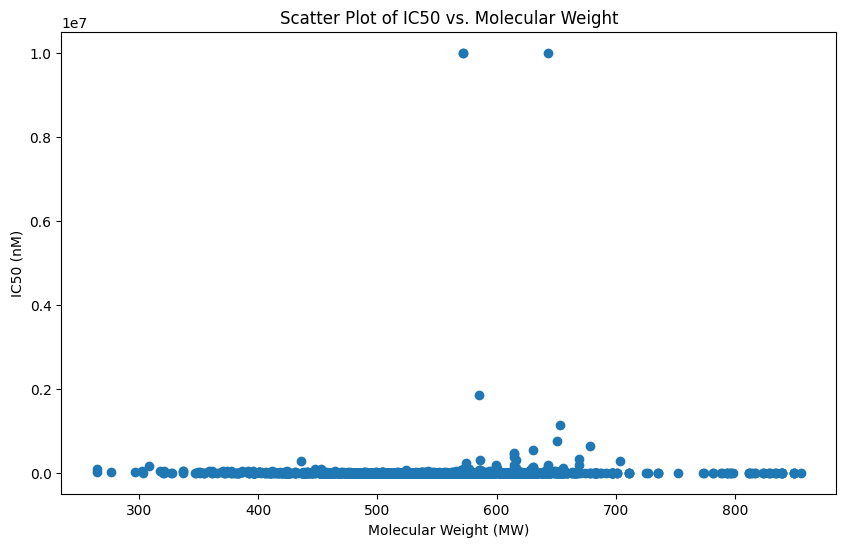

In [28]:
# prompt: do a scatter plot to visualize the distribution of IC50

import matplotlib.pyplot as plt

# Create a scatter plot of IC50 values
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['MW'], df_combined['standard_value'])
plt.xlabel('Molecular Weight (MW)')
plt.ylabel('IC50 (nM)')
plt.title('Scatter Plot of IC50')
plt.show()


Convert the IC50 value to pIC50 because the IC50 values are not on the same scale which is why we take the negative logarithmic value and normalize the IC50 values.

In [26]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [29]:
df_combined.standard_value.describe()

count    2.188000e+03
mean     1.983703e+04
std      3.744220e+05
min      3.000000e-03
25%      2.900000e+00
50%      2.400000e+01
75%      2.045000e+02
max      1.000000e+07
Name: standard_value, dtype: float64

In [30]:
-np.log10( (10**-9)* 100000000 )

1.0

In [31]:
-np.log10( (10**-9)* 10000000000 )

-1.0

Caps the numbers that are greater than 100000000 and makes it equal to 100000000 so that the negative values are avoided during transformation, when we take -log10(x)

In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [33]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-32-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.71140,0.0,9.0,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.64940,0.0,8.0,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.28940,0.0,4.0,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.40760,0.0,7.0,15.0
...,...,...,...,...,...,...,...,...
2183,CHEMBL1817915,CCCCCCCC/C=C/c1c(C)c(/C=C/CCCCCCCC)c2[n+](c1C)...,active,565.805,9.14354,0.0,2.0,48090.0
2184,CHEMBL1817916,CCCCCCCCCCc1c(C)c(CCCCCCCCCC)c2[n+](c1C)CCCCC2...,active,569.837,8.98234,0.0,2.0,37610.0
2185,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,7.9
2186,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,1.4


In [34]:
df_norm.standard_value_norm.describe()

count    2.188000e+03
mean     1.983703e+04
std      3.744220e+05
min      3.000000e-03
25%      2.900000e+00
50%      2.400000e+01
75%      2.045000e+02
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [35]:
df_final = pIC50(df_norm)
df_final

<ipython-input-26-fdebd4873966>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.71140,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.64940,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.28940,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.40760,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2183,CHEMBL1817915,CCCCCCCC/C=C/c1c(C)c(/C=C/CCCCCCCC)c2[n+](c1C)...,active,565.805,9.14354,0.0,2.0,4.317945
2184,CHEMBL1817916,CCCCCCCCCCc1c(C)c(CCCCCCCCCC)c2[n+](c1C)CCCCC2...,active,569.837,8.98234,0.0,2.0,4.424697
2185,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,8.102373
2186,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,8.853872


In [36]:
df_final.pIC50.describe()

count    2188.000000
mean        7.499021
std         1.396019
min         2.000000
25%         6.689311
50%         7.619789
75%         8.537602
max        11.522879
Name: pIC50, dtype: float64

### Removing the intermediate class

In [38]:
df_2c = df_final[df_final.bioactivity_class != "intermediate"]
df_2c

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.71140,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.64940,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.28940,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.40760,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2183,CHEMBL1817915,CCCCCCCC/C=C/c1c(C)c(/C=C/CCCCCCCC)c2[n+](c1C)...,active,565.805,9.14354,0.0,2.0,4.317945
2184,CHEMBL1817916,CCCCCCCCCCc1c(C)c(CCCCCCCCCC)c2[n+](c1C)CCCCC2...,active,569.837,8.98234,0.0,2.0,4.424697
2185,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,8.102373
2186,CHEMBL41275,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)Nc2ccc(C[N+](C)(C)...,active,531.140,3.77982,1.0,2.0,8.853872


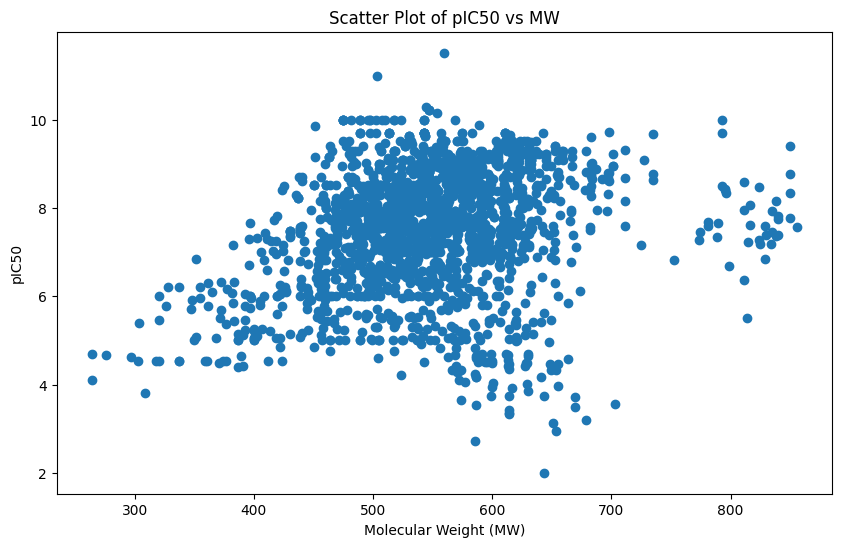

In [39]:
# prompt: plot a scatterplot distribution of pIC50 vs MW

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_2c['MW'], df_2c['pIC50'])
plt.xlabel('Molecular Weight (MW)')
plt.ylabel('pIC50')
plt.title('Scatter Plot of pIC50 vs MW')
plt.show()


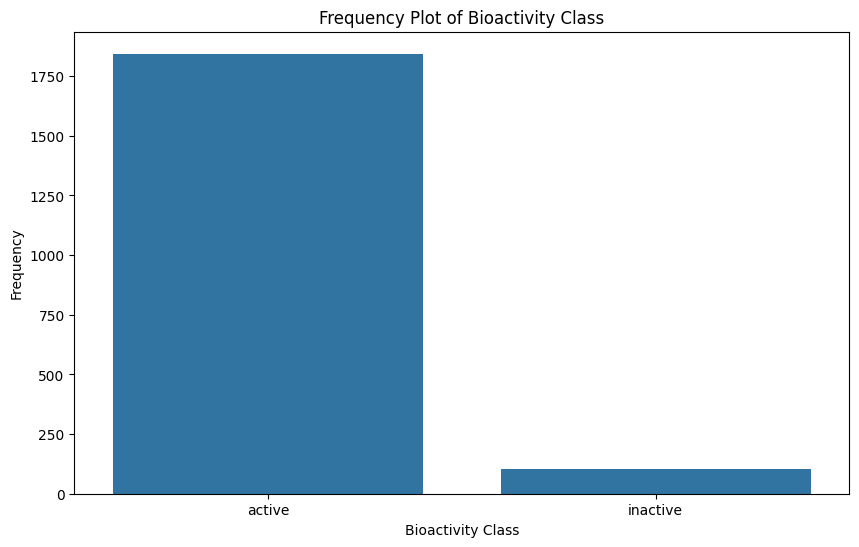

In [40]:
# prompt: give a frequency plot for the bioactivity class

import matplotlib.pyplot as plt
import seaborn as sns

# Create a frequency plot of the bioactivity class
plt.figure(figsize=(10, 6))
sns.countplot(x='bioactivity_class', data=df_2c)
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Bioactivity Class')
plt.show()


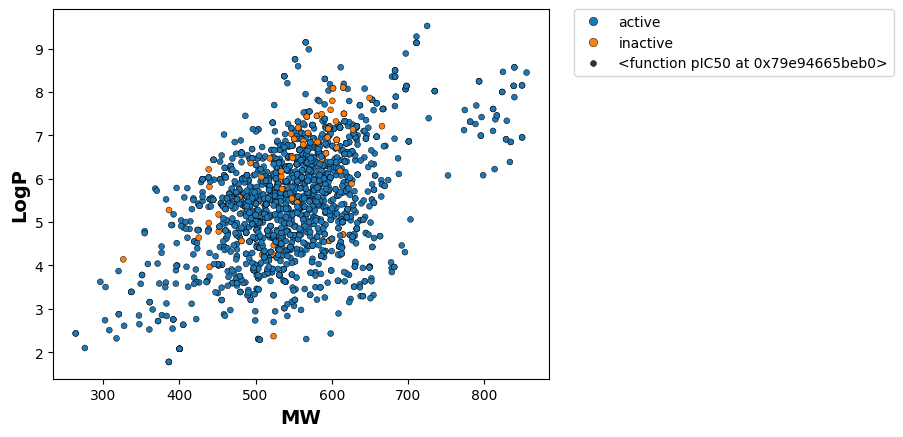

In [45]:
sns.scatterplot(x = "MW", y = "LogP",hue= "bioactivity_class",data=df_2c,size= pIC50, edgecolor = "black")

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

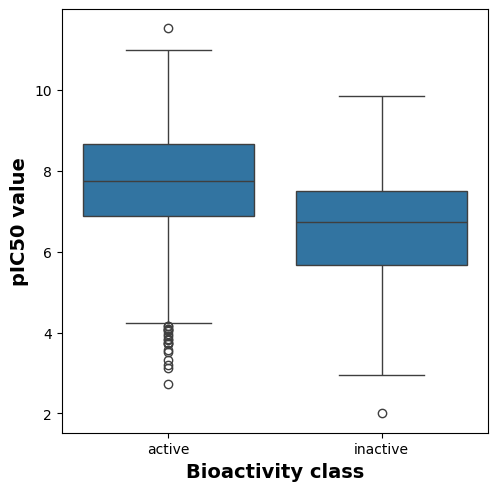

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2c )

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


In [51]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2c[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2c[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [52]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,134658.0,3.734231e-12,0.05,Different distribution (reject H0)


The active and inactive compounds have a significantly different pIC50

#### Molecular Weights

Text(0, 0.5, 'MW')

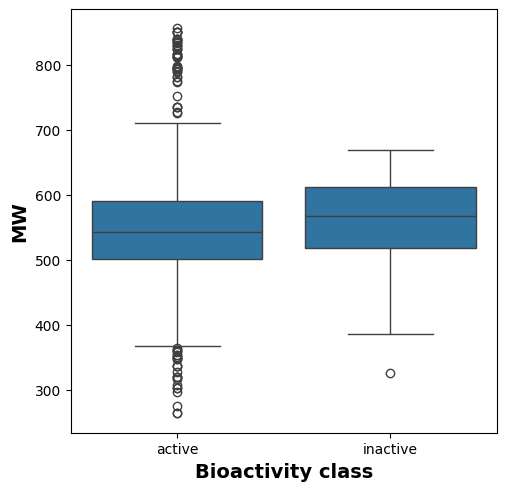

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2c)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')


In [55]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,81967.0,0.012622,0.05,Different distribution (reject H0)


Significantly different molecular weights

#### LogP

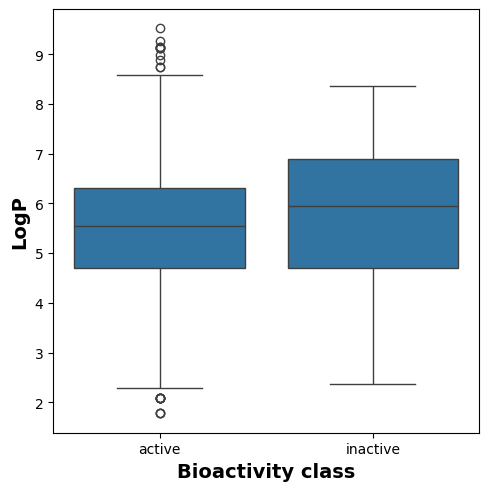

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2c)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')



In [57]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,81201.5,0.008503,0.05,Different distribution (reject H0)


Significantly different LogP values

#### NumHDonors

Text(0, 0.5, 'NumHDonors')

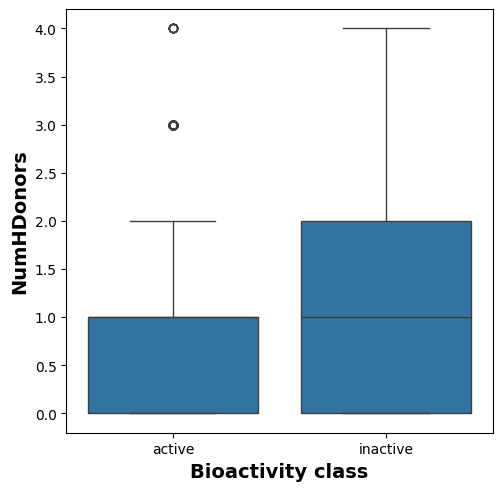

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2c)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [60]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,83220.0,0.013703,0.05,Different distribution (reject H0)


Significantly different number of Hydrogen donors

#### NumHAcceptors

Text(0, 0.5, 'NumHAcceptors')

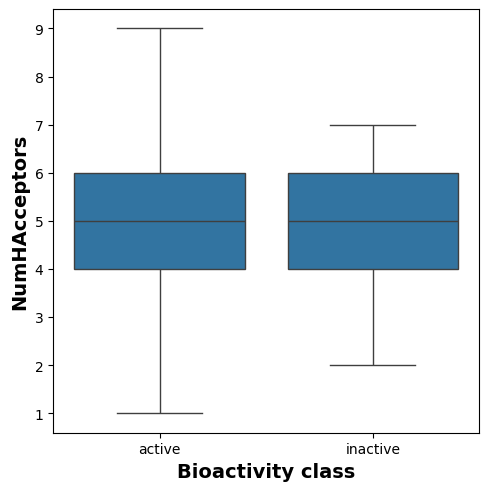

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2c)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')


In [63]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,93671.0,0.683184,0.05,Same distribution (fail to reject H0)


No statistically significant difference between NumHAcceptors for active compounds vs inactive compounds